In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

data = pd.read_csv('ml_case_training_data.csv')

In [60]:
data.head()

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,no_consumption,churn,days_active,days_since_last_modification,...,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,0002203ffbb812588b632b9e628cc38d,NaN,foosdfpfkusacimwkcsosbicdxkicaua,22034,0,3084,0,0,2224,1863,...,40.606701,0,40.78,43.08,43.08,1,81.42,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,17.250
1,0004351ebdd665e6ee664792efc4fd13,NaN,NaN,4060,0,0,1,0,2511,732,...,44.311378,0,0.00,24.42,24.42,1,61.58,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200
2,0010bcc39e42b3c2131ed2ce55246e3c,fskfsbkdioupwobbsaoospkxaafmwobl,usilxuppasemubllopkaafesmlibmsdf,7440,0,1062,0,0,1165,-68,...,45.806878,0,213.76,38.58,38.58,2,81.61,3,lxidpiddsbxsbosboudacockeimpuepw,13.856
3,0010ee3855fdea87602a5b7aba8e42de,apdekpcbwosbxepsfxclislboipuxpop,lmkebamcaaclubfxadlmueccxoimlema,4199490,728810,456462,0,0,2192,1833,...,40.606701,1,1533.07,-2.80,-2.80,2,897.08,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,33.000
4,00114d74e963e47177db89bc70108537,sumdxiaiudmaioicexmiwuudlblkissm,ewpakwlliwisiwduibdlfmalxowmwpci,11272,0,0,1,0,2192,1833,...,44.311378,0,0.00,29.76,29.76,1,157.99,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200


In [61]:
days = data.drop(['id','activity_new','channel_sales','cons_12m','cons_gas_12m','cons_last_month','no_consumption', 
'forecast_base_bill_ele','forecast_base_bill_year','forecast_bill_12m','forecast_cons','forecast_cons_12m',
'forecast_cons_year','forecast_discount_energy','forecast_meter_rent_12m','forecast_price_energy_p1','forecast_price_energy_p2',
'forecast_price_pow_p1','has_gas','imp_cons','margin_gross_pow_ele','margin_net_pow_ele','nb_prod_act','net_margin',
'num_years_antig','origin_up','pow_max'],axis=1)

days.head()

,churn,days_active,days_since_last_modification
0,0,2224,1863
1,0,2511,732
2,0,1165,-68
3,0,2192,1833
4,0,2192,1833


In [62]:
print('days shape: ', days.shape)
print('----------[days infomation]----------')
print(days.info())

days shape:  (16092, 3)
----------[days infomation]----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16092 entries, 0 to 16091
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   churn                         16092 non-null  int64
 1   days_active                   16092 non-null  int64
 2   days_since_last_modification  16092 non-null  int64
dtypes: int64(3)
memory usage: 377.3 KB
None


(array([   39.,     0.,     0.,     0.,  1300., 14597.,     0.,     0.,
            0.,   156.]),
 array([-4.23980e+04, -3.39209e+04, -2.54438e+04, -1.69667e+04,
        -8.48960e+03, -1.25000e+01,  8.46460e+03,  1.69417e+04,
         2.54188e+04,  3.38959e+04,  4.23730e+04]),
 <BarContainer object of 10 artists>)

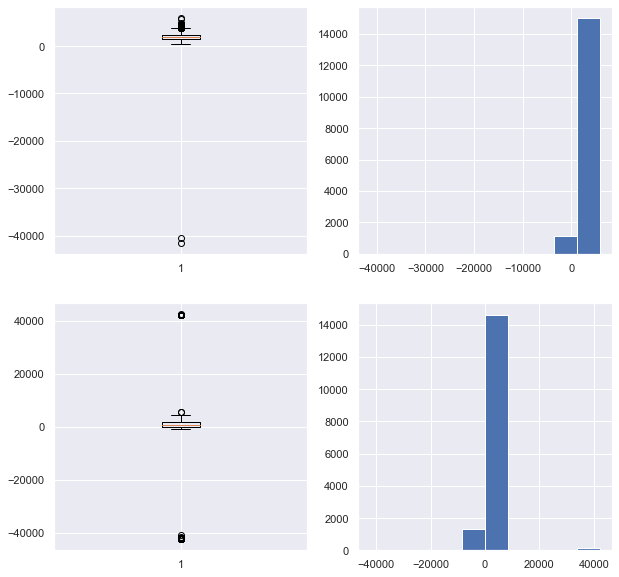

In [63]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.boxplot(days.days_active)
plt.subplot(2,2,2)
plt.hist(days.days_active)
plt.subplot(2,2,3)
plt.boxplot(days.days_since_last_modification)
plt.subplot(2,2,4)
plt.hist(days.days_since_last_modification)

In [64]:
n = 0
for i in range(len(days.days_since_last_modification)):
    if days.days_since_last_modification[i] < 0:
        n = n+1
print(n)

1458


In [65]:
for i in range(len(days.days_active)):
    if days.days_active[i] < 0:
        days.days_active[i] = abs(days.days_active[i])

for i in range(len(days.days_since_last_modification)):
    if days.days_since_last_modification[i] < 0:
        days.days_since_last_modification[i] = abs(days.days_since_last_modification[i])

In [66]:
n1 = 0
a1 = []
b1 = []
for i in range(len(days.days_active)):
    if abs(days.days_active[i]) >= 40000:
        n1 = n1+1
        a1.append(i)
        b1.append(days.days_active[i])
print(n1)
print(a1)
print(b1)

2
[14859, 15554]
[40427, 41444]


In [67]:
n2 = 0
a2 = []
b2 = []
for i in range(len(days.days_since_last_modification)):
    if abs(days.days_since_last_modification[i]) >= 40000:
        n2 = n2+1
        a2.append(i)
        b2.append(days.days_since_last_modification[i])
print(n2)
print(a2)
print(b2)

195
[31, 73, 172, 352, 362, 537, 559, 581, 686, 837, 975, 997, 1363, 1399, 1480, 1584, 1628, 1649, 1668, 1792, 1811, 2123, 2187, 2255, 2269, 2314, 2361, 2365, 2377, 2467, 2576, 2603, 2612, 2977, 3376, 3411, 3424, 3435, 3512, 3569, 3660, 3793, 4134, 4167, 4332, 4512, 4647, 4829, 4868, 4877, 4888, 4996, 5271, 5317, 5384, 5509, 5748, 6135, 6319, 6360, 6439, 6523, 6565, 6568, 6727, 6904, 7154, 7214, 7265, 7270, 7289, 7405, 7490, 7493, 7503, 7586, 7713, 7714, 7747, 7856, 7874, 7950, 7961, 8091, 8180, 8202, 8363, 8390, 8467, 8472, 8661, 8731, 8745, 8873, 8950, 8970, 9165, 9202, 9326, 9495, 9537, 9615, 9721, 9775, 9776, 9853, 9890, 9968, 10029, 10053, 10120, 10121, 10141, 10167, 10224, 10264, 10317, 10410, 10422, 10533, 10546, 10704, 10728, 11024, 11082, 11293, 11322, 11380, 11385, 11446, 11540, 11828, 11876, 12021, 12080, 12098, 12137, 12179, 12304, 12351, 12371, 12380, 12508, 12546, 12669, 12711, 12827, 12840, 13056, 13069, 13118, 13254, 13319, 13361, 13401, 13479, 13858, 13881, 13940, 1398

In [68]:
days = days.drop(a2)
days = days.drop([15554])

In [69]:
churned = days[days['churn'] == 1]
not_churned = days[days['churn'] == 0]

In [70]:
churned

,churn,days_active,days_since_last_modification
9,1,1461,1096
10,1,2479,286
43,1,1142,217
70,1,1827,1462
77,1,1095,738
...,...,...,...
16030,1,1096,15
16040,1,1620,366
16041,1,2557,631
16046,1,2557,2193


In [71]:
not_churned

,churn,days_active,days_since_last_modification
0,0,2224,1863
1,0,2511,732
2,0,1165,68
3,0,2192,1833
4,0,2192,1833
...,...,...,...
16086,0,4173,3808
16088,0,2192,1827
16089,0,1098,372
16090,0,1826,1461


(array([8.800e+02, 3.679e+03, 5.876e+03, 3.006e+03, 3.490e+02, 1.090e+02,
        2.380e+02, 1.870e+02, 0.000e+00, 2.000e+00]),
 array([ 731. , 1250.4, 1769.8, 2289.2, 2808.6, 3328. , 3847.4, 4366.8,
        4886.2, 5405.6, 5925. ]),
 <BarContainer object of 10 artists>)

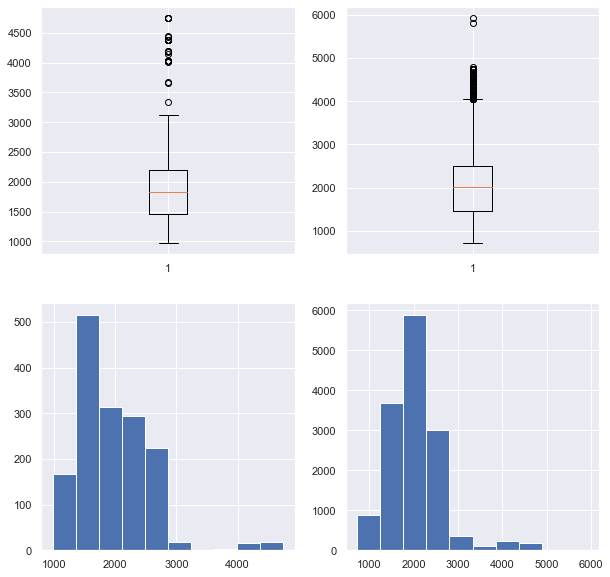

In [72]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.boxplot(churned.days_active)
plt.subplot(2,2,2)
plt.boxplot(not_churned.days_active)
plt.subplot(2,2,3)
plt.hist(churned.days_active)
plt.subplot(2,2,4)
plt.hist(not_churned.days_active)


(array([6.241e+03, 2.502e+03, 1.370e+03, 3.616e+03, 2.430e+02, 1.050e+02,
        1.450e+02, 1.020e+02, 0.000e+00, 2.000e+00]),
 array([   0.,  556., 1112., 1668., 2224., 2780., 3336., 3892., 4448.,
        5004., 5560.]),
 <BarContainer object of 10 artists>)

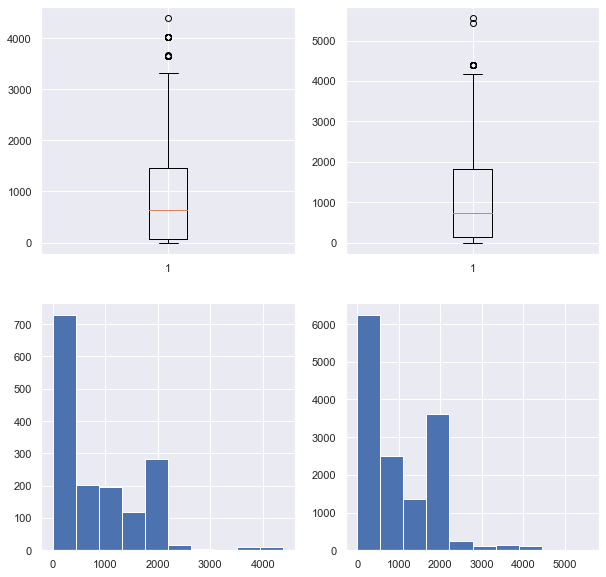

In [73]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.boxplot(churned.days_since_last_modification)
plt.subplot(2,2,2)
plt.boxplot(not_churned.days_since_last_modification)
plt.subplot(2,2,3)
plt.hist(churned.days_since_last_modification)
plt.subplot(2,2,4)
plt.hist(not_churned.days_since_last_modification)

In [74]:
pd.pivot_table(days,index=["churn"],values=['days_active','days_since_last_modification'])

,days_active,days_since_last_modification
churn,,
0,2041.500558,1004.929429
1,1891.805732,847.743312


In [75]:
days.corr()

,churn,days_active,days_since_last_modification
churn,1.000000,-0.071622,-0.052563
days_active,-0.071622,1.000000,0.451153
days_since_last_modification,-0.052563,0.451153,1.000000
